In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.4.0'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv(r'C:\Users\meetd\OneDrive\Desktop\Datasets\a-z-handwritten-alphabets\A_Z-Handwritten-Data.csv')

In [5]:
print(data.shape)
data = data.sample(frac=0.01)
print(data.shape)

(372450, 785)
(3724, 785)


In [6]:
x = data.iloc[:,1:].values
y = data.iloc[:,0].values
x = np.array(x)
y = np.array(y)
print(x.shape, y.shape)
x = np.reshape(x, (x.shape[0],28,28,1))
y = np.reshape(y, (y.shape[0],1))
print(x.shape,y.shape)

(3724, 784) (3724,)
(3724, 28, 28, 1) (3724, 1)


In [7]:
plot = x[99].reshape(28,28,1)
print(plot.shape)

(28, 28, 1)


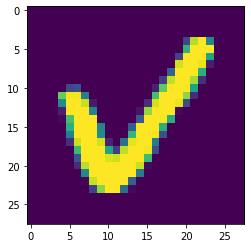

In [8]:
plt.imshow(plot)

In [9]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=128,strides=1, 
                               padding='same',kernel_size=(3,3), 
                               activation="relu", input_shape=[28,28,1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=None))
cnn.add(tf.keras.layers.Conv2D(filters=32,strides=1, 
                               padding='same',kernel_size=(3,3), 
                               activation="relu", input_shape=[14,14,1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=None))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation="relu"))
cnn.add(tf.keras.layers.Dense(units=26,activation="softmax"))

In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        36896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               200832    
_________________________________________________________________
dense_1 (Dense)              (None, 26)                3

In [11]:
cnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [12]:
print(x.shape,y.shape)

(3724, 28, 28, 1) (3724, 1)


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

In [14]:
print(x_train.shape, y_train.shape)

(3351, 28, 28, 1) (3351, 1)


In [15]:
print(y[0:1000])

[[22]
 [18]
 [ 7]
 [ 1]
 [19]
 [14]
 [25]
 [ 3]
 [19]
 [17]
 [14]
 [20]
 [25]
 [19]
 [ 6]
 [18]
 [20]
 [ 1]
 [20]
 [25]
 [15]
 [ 3]
 [ 4]
 [ 9]
 [ 4]
 [ 3]
 [14]
 [22]
 [19]
 [20]
 [ 9]
 [ 3]
 [10]
 [13]
 [ 9]
 [17]
 [15]
 [ 2]
 [24]
 [19]
 [ 2]
 [10]
 [18]
 [18]
 [14]
 [18]
 [ 0]
 [11]
 [15]
 [18]
 [18]
 [17]
 [15]
 [19]
 [20]
 [ 1]
 [ 0]
 [11]
 [15]
 [14]
 [14]
 [22]
 [10]
 [19]
 [12]
 [ 2]
 [18]
 [ 0]
 [13]
 [ 4]
 [ 9]
 [11]
 [ 2]
 [12]
 [10]
 [18]
 [22]
 [15]
 [ 2]
 [20]
 [ 2]
 [14]
 [18]
 [15]
 [ 2]
 [ 0]
 [14]
 [24]
 [18]
 [18]
 [14]
 [23]
 [13]
 [ 2]
 [10]
 [24]
 [19]
 [14]
 [19]
 [21]
 [19]
 [18]
 [15]
 [12]
 [ 9]
 [18]
 [12]
 [ 4]
 [ 0]
 [10]
 [ 9]
 [ 4]
 [17]
 [19]
 [13]
 [20]
 [13]
 [14]
 [14]
 [22]
 [ 1]
 [ 3]
 [19]
 [14]
 [17]
 [ 2]
 [24]
 [12]
 [22]
 [18]
 [ 2]
 [ 2]
 [ 2]
 [12]
 [17]
 [12]
 [18]
 [ 2]
 [18]
 [20]
 [12]
 [ 1]
 [19]
 [ 2]
 [20]
 [24]
 [ 4]
 [17]
 [14]
 [25]
 [14]
 [11]
 [24]
 [22]
 [ 6]
 [14]
 [ 4]
 [22]
 [ 4]
 [ 2]
 [19]
 [20]
 [10]
 [ 9]
 [13]
 [24]
 [15

In [16]:
cnn.fit(x_train, y_train,  epochs=10, validation_split=0.1)

Epoch 1/10
95/95 [==============================] - 10s 93ms/step - loss: 5.7514 - accuracy: 0.3535 - val_loss: 0.8401 - val_accuracy: 0.7827
Epoch 2/10
95/95 [==============================] - 7s 70ms/step - loss: 0.6123 - accuracy: 0.8192 - val_loss: 0.6006 - val_accuracy: 0.8304
Epoch 3/10
95/95 [==============================] - 7s 69ms/step - loss: 0.2520 - accuracy: 0.9193 - val_loss: 0.5140 - val_accuracy: 0.8571
Epoch 4/10
95/95 [==============================] - 7s 70ms/step - loss: 0.1419 - accuracy: 0.9510 - val_loss: 0.5061 - val_accuracy: 0.8958
Epoch 5/10
95/95 [==============================] - 7s 70ms/step - loss: 0.1123 - accuracy: 0.9668 - val_loss: 0.5256 - val_accuracy: 0.8869
Epoch 6/10
95/95 [==============================] - 7s 70ms/step - loss: 0.0759 - accuracy: 0.9739 - val_loss: 0.5099 - val_accuracy: 0.8899
Epoch 7/10
95/95 [==============================] - 7s 69ms/step - loss: 0.0573 - accuracy: 0.9809 - val_loss: 0.5851 - val_accuracy: 0.8810
Epoch 8/10
9

In [49]:
y_pred = cnn.predict(x_test)
print(y_pred)
y_pred_softmax = []
for i in range(y_pred.shape[0]):
    y_pred_softmax.append(np.argmax(y_pred[i]))
y_pred_softmax = np.array(y_pred_softmax).reshape(y_pred.shape[0],1)


[[4.1344761e-11 3.3701902e-11 3.8937639e-15 ... 4.2253862e-10
  8.0064955e-11 1.1490687e-11]
 [9.6884334e-01 5.5875583e-04 4.7218744e-08 ... 2.0725597e-06
  8.0848916e-10 1.7554396e-06]
 [3.4466371e-12 1.4060793e-17 9.9486083e-01 ... 3.7453547e-14
  2.6854727e-12 8.6266411e-11]
 ...
 [1.6515030e-07 3.6552483e-11 4.0450036e-11 ... 2.1530189e-11
  3.1339897e-09 1.7428270e-14]
 [2.3936957e-12 1.7607101e-12 2.1882364e-08 ... 1.9956248e-09
  7.7246120e-13 3.7337666e-14]
 [3.6722925e-13 1.4499263e-19 7.2325799e-14 ... 7.8295696e-17
  7.6187874e-17 5.8268659e-15]]


In [51]:
print(y_pred_softmax.shape,y_test.shape)
print(y_pred_softmax)
print("====================================================================================")
print(y_test)

(373, 1) (373, 1)
[[18]
 [ 0]
 [ 2]
 [15]
 [18]
 [ 1]
 [18]
 [23]
 [ 5]
 [25]
 [17]
 [ 6]
 [11]
 [ 2]
 [14]
 [ 9]
 [25]
 [20]
 [20]
 [18]
 [15]
 [10]
 [21]
 [12]
 [23]
 [ 2]
 [18]
 [14]
 [ 7]
 [18]
 [17]
 [20]
 [18]
 [ 0]
 [14]
 [18]
 [ 9]
 [14]
 [14]
 [ 2]
 [19]
 [ 6]
 [ 9]
 [18]
 [12]
 [ 4]
 [20]
 [18]
 [19]
 [15]
 [15]
 [ 2]
 [ 1]
 [ 2]
 [18]
 [18]
 [ 2]
 [14]
 [11]
 [18]
 [22]
 [25]
 [12]
 [17]
 [19]
 [14]
 [22]
 [13]
 [ 2]
 [20]
 [ 3]
 [20]
 [18]
 [ 1]
 [14]
 [18]
 [20]
 [17]
 [20]
 [20]
 [ 2]
 [11]
 [15]
 [20]
 [ 2]
 [ 2]
 [16]
 [13]
 [12]
 [ 9]
 [ 6]
 [18]
 [ 4]
 [13]
 [18]
 [19]
 [18]
 [18]
 [ 3]
 [20]
 [ 4]
 [19]
 [18]
 [ 2]
 [14]
 [25]
 [ 0]
 [15]
 [19]
 [14]
 [18]
 [13]
 [ 1]
 [22]
 [11]
 [11]
 [14]
 [18]
 [18]
 [ 0]
 [15]
 [14]
 [14]
 [ 3]
 [15]
 [22]
 [14]
 [18]
 [19]
 [24]
 [20]
 [14]
 [ 6]
 [ 3]
 [13]
 [19]
 [ 2]
 [18]
 [ 2]
 [ 2]
 [19]
 [14]
 [18]
 [17]
 [ 3]
 [13]
 [ 1]
 [14]
 [18]
 [ 2]
 [14]
 [14]
 [14]
 [12]
 [11]
 [18]
 [14]
 [14]
 [18]
 [20]
 [24]
 [14]
 [17]
 [ 2

In [53]:
count = 0
for i in range(y_pred_softmax.shape[0]):
    if y_pred_softmax[i] == y_test[i]:
        count = count + 1
print("Accuracy = " + str(count/y_test.shape[0]))

Accuracy = 0.8766756032171582
